# Projekt ML.

Do analizy przyjęto dane ze zbiotu 'cars.csv'

Zestawy danych przygotowano w części "Projekt ML, przygotowanie danych"

## Cel analizy: Od czego zależy bardziej ekonomiczne zużycie paliwa? Czy da się przewidzieć zużycie paliwa na podstawie danych ze zbioru?

Uczenie maszynowe będzie wykorzystywać regresję.

Dane do przetwarzania przygotowano z zamiarem pokazania wpływu jakości danych na efekty uczenia maszynowego.

Przygotowane zbiory danych:

Zbiór 1. Dane kategoryczne zostaną potraktowane jako liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 2. Dane kategoryczne 'origin' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 3. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 4. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' zostaje rozpisana na słownik i bierze udział w ML  (taka namiastka LLM, to jest dobry moment na uśmiech)

Uczenie maszynowe z wykorzystaniem algorytmów:

* sklearn: LinearRegression

* sklearn: KNeighborsRegressor

W celu pokazania jak radzą sobie inne algorytmy ML pokazano parametry uczenia dla RandomForestRegressor oraz xgboost. Chodzi o pokazanie punktu odniesienia.


Hiperparametry algorytmów uczenia maszynowego nie są optymalizowane, przyjęto wartiości "przyzwoite"

W celu pozostawienia pola do popisu ocena uczenia realizowana jest metodą .score()

In [28]:
# import potrzebnych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg


In [8]:
# przygotowanie zestawienia zbiorów
data_file_names = [ '../data/cars_4_ML_no_dummy_cleared.csv', '../data/cars_4_ML_dummy_origin_cleared.csv',
              '../data/cars_4_ML_dummy_all_cleared.csv', '../data/cars_4_ML_dummy_all_LLM_cleared.csv']
data_names = [ 'num', 'num_cat_origin', 'num_cat_all', 'num_cat_all_LLM' ]

In [9]:
# przygotowanie zestawienia modeli
model_lin = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=5)
model_rf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
model_xgb = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 0)

models = [ model_lin, model_knn, model_rf, model_xgb ]
models_names = [ 'model_lin', 'model_knn', 'model_rf', 'model_xgb' ]

In [10]:
results = pd.DataFrame(columns= ['data_name', 'model_name', 'score_train', 'score_test'])
for data in data_names:
    df = pd.read_csv(data_file_names[data_names.index(data)])
    X_no_scaler = df.drop(columns=['name', 'mpg']).values
    scaler_x = StandardScaler()
    X = scaler_x.fit_transform(X_no_scaler)
    y_no_scaler = df['mpg'].values.reshape((-1,1))
    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y_no_scaler).reshape((-1,))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    for model in models:
        model_name = models_names[models.index(model)]
        model.fit(X_train, y_train)
        
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)

        index = len(results)
        results.loc[index,'data_name'] = data
        results.loc[index,'model_name'] = model_name
        results.loc[index,'score_train'] = score_train
        results.loc[index,'score_test'] = score_test
        
        
    
print(results)

c:\Program Files\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Program Files\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Program Files\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


          data_name model_name score_train score_test
0               num  model_lin    0.832622   0.828823
1               num  model_knn     0.89511   0.870602
2               num   model_rf    0.980802   0.909116
3               num  model_xgb    0.999989   0.908028
4    num_cat_origin  model_lin    0.876747   0.848826
5    num_cat_origin  model_knn    0.927059   0.893803
6    num_cat_origin   model_rf      0.9869   0.918743
7    num_cat_origin  model_xgb    0.999992   0.908184
8       num_cat_all  model_lin    0.886706   0.820164
9       num_cat_all  model_knn    0.929549    0.85214
10      num_cat_all   model_rf    0.986673   0.893801
11      num_cat_all  model_xgb    0.999994   0.893935
12  num_cat_all_LLM  model_lin    0.982354   0.772834
13  num_cat_all_LLM  model_knn    0.793263   0.669914
14  num_cat_all_LLM   model_rf      0.9875   0.888734
15  num_cat_all_LLM  model_xgb    0.999681   0.870612


c:\Program Files\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
# wyniki dla danych
for data in data_names:
    print(results[ results['data_name']==data] )

  data_name model_name score_train score_test
0       num  model_lin    0.832622   0.828823
1       num  model_knn     0.89511   0.870602
2       num   model_rf    0.980802   0.909116
3       num  model_xgb    0.999989   0.908028
        data_name model_name score_train score_test
4  num_cat_origin  model_lin    0.876747   0.848826
5  num_cat_origin  model_knn    0.927059   0.893803
6  num_cat_origin   model_rf      0.9869   0.918743
7  num_cat_origin  model_xgb    0.999992   0.908184
      data_name model_name score_train score_test
8   num_cat_all  model_lin    0.886706   0.820164
9   num_cat_all  model_knn    0.929549    0.85214
10  num_cat_all   model_rf    0.986673   0.893801
11  num_cat_all  model_xgb    0.999994   0.893935
          data_name model_name score_train score_test
12  num_cat_all_LLM  model_lin    0.982354   0.772834
13  num_cat_all_LLM  model_knn    0.793263   0.669914
14  num_cat_all_LLM   model_rf      0.9875   0.888734
15  num_cat_all_LLM  model_xgb    0.999681  

In [12]:
# wyniki dla modeli
for model_n in models_names:
    print(results[ results['model_name']==model_n] )

          data_name model_name score_train score_test
0               num  model_lin    0.832622   0.828823
4    num_cat_origin  model_lin    0.876747   0.848826
8       num_cat_all  model_lin    0.886706   0.820164
12  num_cat_all_LLM  model_lin    0.982354   0.772834
          data_name model_name score_train score_test
1               num  model_knn     0.89511   0.870602
5    num_cat_origin  model_knn    0.927059   0.893803
9       num_cat_all  model_knn    0.929549    0.85214
13  num_cat_all_LLM  model_knn    0.793263   0.669914
          data_name model_name score_train score_test
2               num   model_rf    0.980802   0.909116
6    num_cat_origin   model_rf      0.9869   0.918743
10      num_cat_all   model_rf    0.986673   0.893801
14  num_cat_all_LLM   model_rf      0.9875   0.888734
          data_name model_name score_train score_test
3               num  model_xgb    0.999989   0.908028
7    num_cat_origin  model_xgb    0.999992   0.908184
11      num_cat_all  model_x

In [13]:
# najlepsze wyniki dla danych testowych
print('Najlepsze wyniki dla danych testowych:')
print(results.sort_values(by=['score_test'], ascending=False))

Najlepsze wyniki dla danych testowych:
          data_name model_name score_train score_test
6    num_cat_origin   model_rf      0.9869   0.918743
2               num   model_rf    0.980802   0.909116
7    num_cat_origin  model_xgb    0.999992   0.908184
3               num  model_xgb    0.999989   0.908028
11      num_cat_all  model_xgb    0.999994   0.893935
5    num_cat_origin  model_knn    0.927059   0.893803
10      num_cat_all   model_rf    0.986673   0.893801
14  num_cat_all_LLM   model_rf      0.9875   0.888734
15  num_cat_all_LLM  model_xgb    0.999681   0.870612
1               num  model_knn     0.89511   0.870602
9       num_cat_all  model_knn    0.929549    0.85214
4    num_cat_origin  model_lin    0.876747   0.848826
0               num  model_lin    0.832622   0.828823
8       num_cat_all  model_lin    0.886706   0.820164
12  num_cat_all_LLM  model_lin    0.982354   0.772834
13  num_cat_all_LLM  model_knn    0.793263   0.669914


<Axes: xlabel='score_train', ylabel='score_test'>

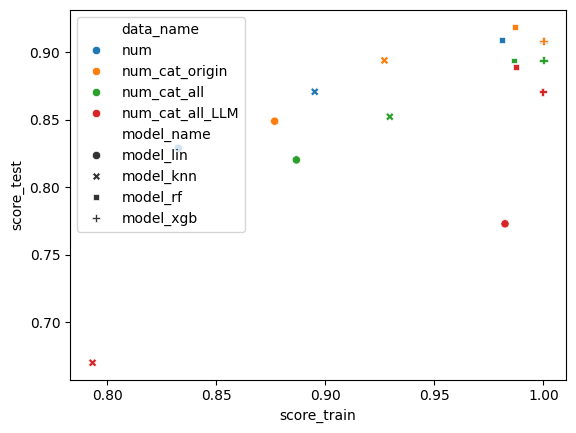

In [14]:
sns.scatterplot(data=results, x='score_train', y='score_test', hue='data_name', style='model_name')

Metody LinearRegression oraz KNeighborsRegressor dają całkiem niezłe wyniki. Wyniki są mocno zależne od danych, które są przedstawiane do uczenia i testowania.

Przypominam, że metody RandomForestRegressor oraz xgboost tylko jako punkty odniesienia.

Pomysły na ulepszenia:

* przegląd danych pod kątem rozkładów, typów relacji, może potraktować logarytmem, itd.

* pomysły na traktowanie kategorii w danych

* pomysły na nowe features (zmienne na podstawie których ML określa wynik)

* inne miary dopasowania modeli, może sposoby uczenia, ...

* inny sposób normalizacji danych

* może inaczej przygotować dane, inny sposób określenia outliers, ...

In [37]:
# metryki (MAE, RMSE, R²)
# Walidacja krzyżowa

metrics = []
cv = KFold(n_splits=5, shuffle=True, random_state=0)

for data_idx, data in enumerate(data_names):

    df = pd.read_csv(data_file_names[data_idx])   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for model, model_name in zip(models, models_names):
        y_pred_test = model.predict(X_test)
        # neg_root_mean_squared_error => po odwróceniu będzie RMSE
        scores = cross_val_score(model, X, y, cv=cv,
                                 scoring="neg_root_mean_squared_error",
                                 n_jobs=-1)
        metrics.append({
            "data":  data,
            "model": model_name,
            "MAE":   mean_absolute_error(y_test, y_pred_test),
            "RMSE":  np.sqrt(mean_squared_error(y_test, y_pred_test)),
            "R2":    r2_score(y_test, y_pred_test),
            "CV_RMSE_mean": -scores.mean(),
            "CV_RMSE_std":  scores.std()
        })

metrics_df = pd.DataFrame(metrics)
metrics_df

,data,model,MAE,RMSE,R2,CV_RMSE_mean,CV_RMSE_std
0,num,model_lin,23.496374,24.517907,-8.883931,3.499794,0.436556
1,num,model_knn,23.485858,24.558866,-8.916982,4.210116,0.294610
2,num,model_rf,23.519046,24.517000,-8.883200,2.265601,0.225094
3,num,model_xgb,23.508895,24.501036,-8.870333,2.373312,0.293590
4,num_cat_origin,model_lin,23.496374,24.517907,-8.883931,3.499794,0.436556
5,num_cat_origin,model_knn,23.485858,24.558866,-8.916982,4.210116,0.294610
6,num_cat_origin,model_rf,23.519046,24.517000,-8.883200,2.265601,0.225094
7,num_cat_origin,model_xgb,23.508895,24.501036,-8.870333,2.373312,0.293590
8,num_cat_all,model_lin,23.496374,24.517907,-8.883931,3.499794,0.436556
9,num_cat_all,model_knn,23.485858,24.558866,-8.916982,4.210116,0.294610


## TODO do usunięcia, notatka robocza

* **MAE (Mean Absolute Error)** — „średni błąd bezwzględny”; intuicyjnie „o ile mpg średnio się mylę”.
* **RMSE** — podkreśla duże błędy (błąd kwadratowy, a potem pierwiastek).
* **R²** — od 0 do 1: ile wariancji wyjaśniamy.  

In [32]:
rf_tuned_rows = []

param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth":   [None, 5, 10, 20],
    "max_features": ["sqrt", "log2", None]
}

for data_idx, data in enumerate(data_names):
    df = pd.read_csv(data_file_names[data_idx])
    X_no_scaler = df.drop(columns=['name', 'mpg']).values
    X = StandardScaler().fit_transform(X_no_scaler)
    y = df['mpg'].values

    rf_base = models[models_names.index("model_rf")]  # Twój RandomForestRegressor

    search = RandomizedSearchCV(
        rf_base, param_dist, n_iter=15,
        scoring="neg_root_mean_squared_error",
        cv=cv, random_state=0, n_jobs=-1
    )
    search.fit(X, y)

    rf_tuned_rows.append({
        "data": data,
        "best_RMSE": -search.best_score_,
        "best_params": search.best_params_
    })

rf_tuned_df = pd.DataFrame(rf_tuned_rows)
rf_tuned_df

,data,best_RMSE,best_params
0,num,2.608124,"{'max_depth': 10, 'max_features': None, 'n_est..."
1,num_cat_origin,2.161854,"{'max_depth': 20, 'max_features': None, 'n_est..."
2,num_cat_all,2.248964,"{'max_depth': 20, 'max_features': None, 'n_est..."
3,num_cat_all_LLM,2.246977,"{'max_depth': 20, 'max_features': None, 'n_est..."


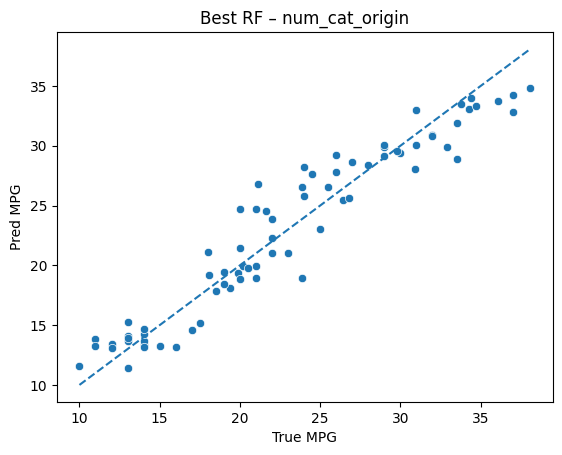

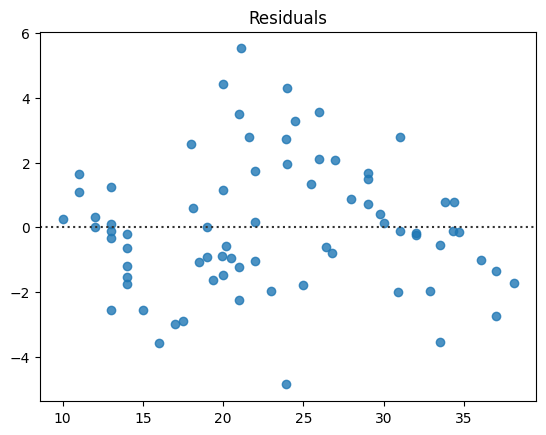

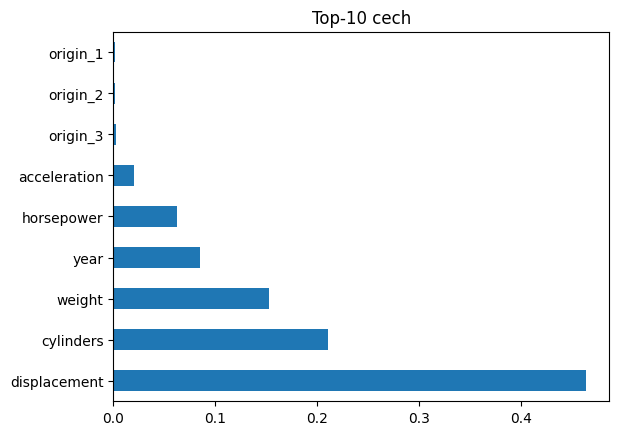

In [34]:
# 1. znajdź najlepszy wiersz
best_row = rf_tuned_df.loc[rf_tuned_df['best_RMSE'].idxmin()]
best_data = best_row['data']
best_params = best_row['best_params']

# 2. wczytaj odpowiadający zbiór
df_best = pd.read_csv(data_file_names[data_names.index(best_data)])
X_best = StandardScaler().fit_transform(df_best.drop(columns=['name', 'mpg']).values)
y_best = df_best['mpg'].values

# 3. trenuj best RF
from sklearn.ensemble import RandomForestRegressor
best_rf = RandomForestRegressor(random_state=0, **best_params)
X_tr, X_te, y_tr, y_te = train_test_split(X_best, y_best, test_size=0.2, random_state=0)
best_rf.fit(X_tr, y_tr)
y_pred_te = best_rf.predict(X_te)

# --- wykresy ---
sns.scatterplot(x=y_te, y=y_pred_te)
plt.plot([y_te.min(), y_te.max()],[y_te.min(), y_te.max()],"--")
plt.xlabel("True MPG"); plt.ylabel("Pred MPG"); plt.title(f"Best RF – {best_data}")
plt.show()

sns.residplot(x=y_te, y=y_pred_te,  line_kws={"color":"red"})
plt.title("Residuals")
plt.show()

# feature importance
importances = pd.Series(best_rf.feature_importances_,
                        index=df_best.drop(columns=['name', 'mpg']).columns)
importances.nlargest(10).plot.barh(); plt.title("Top-10 cech"); plt.show()